# Installere torch
```
pip install torch
```
gå inn på pytorch-nettsiden: pytorch.org

Det kan hende at du på din maskin må velge litt annerledes for at det skal fungere. Sjekk på PyTorch sine nettsider. 

## Importere data
Vi gjorde dette også i forrige time, men la oss repetere litt. 

In [108]:
import urllib
url = "https://programmering-i-skolen.github.io/programmeringiskolen/_static/datasett/iris.csv"
#urllib.request.urlopen(url).read().decode("utf-8").split("\n")
import numpy as np
x = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(0,1,2,3))
species = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(4), dtype=str)

In [109]:
# Koder artene 
y = np.zeros(len(species))
y[species == "setosa"] = 0
y[species == "versicolor"] = 1
y[species == "virginica"] = 2

Text(0, 0.5, 'sepal width')

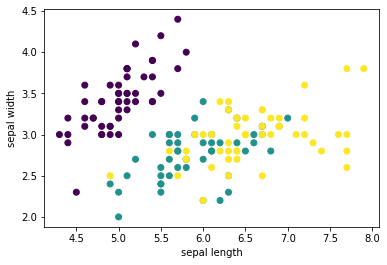

In [110]:
# Plotter 
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

## Modellere data
Forrige gang lagde vi et perseptron som delte datasettet i to biter. Vi klarte å skille mellom "setosa" og de andre, men ikke skille alle tre fra hverandre. 
Vi rakk ikke å se på hvordan vi trener modellen. Vi bare fant noen koeffisienter som lot oss dele opp datasettet i to biter. 

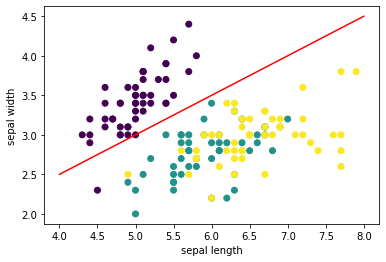

In [145]:
def perceptron(x1, x2, w1, w2, b):
    return x1*w1+x2*w2 + b

def decision_boundary(x1, w1, w2, b):
    return -w1/w2*x1-b/w2

def plot_decision_boundary(w1, w2, b):
    x1 = np.linspace(4, 8, 100)
    x2 = decision_boundary(x1, w1, w2, b)
    plt.plot(x1, x2, "r")
    
w2 = -1
w1 = 0.5
b  = 0.5

plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plot_decision_boundary(w1, w2, b)

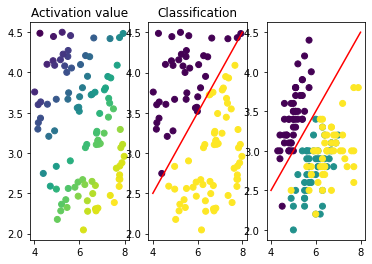

In [147]:
# Hva nå med å gjøre om til nevron
# Alt herifra er nytt!
def perceptron(x1, x2, w1, w2, b):
    return x1*w1+x2*w2 + b

def activation(z):
    return 1/(1+np.exp(-z))

def neuron(x1, x2, w1, w2, b):
    return activation(perceptron(x1, x2, w1, w2, b))

x_b = np.linspace(4, 8, 10)
y_b = decision_boundary(x_b, w1, w2, b)

x_r = np.random.random((100, 2))
x_r[:,0] = x_r[:,0]*4+4
x_r[:,1] = x_r[:,1]*2.5+2
output = neuron(x_r[:,0], x_r[:,1], 0.5, -1, 0.5)

plt.subplot(1, 3,1)
plt.scatter(x_r[:,0], x_r[:,1], c=output)
plt.title("Activation value")

plt.subplot(1, 3,2)
plt.scatter(x_r[:,0], x_r[:,1], c=output>0.5)
plt.plot(x_b, y_b, c="r")
plt.title("Classification")

plt.subplot(1, 3,3)
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(x_b, y_b, c="r")

## En algoritme for å flytte linja nærmere til optimal plassering

Foreløpig har vi brukt: 
> Ser det ut som at linja skiller datapunktene fra hverandre?

Vi trenger: 
1. Et mål for hvor god løsningen vår er
2. En metode for å endre vektene slik at vi kommer til en bedre løsning 





Begynne med å initialisere noen variabler.  

Disse kommer til å oppføre seg litt rart, fordi de er spesielle datatyper som opptrer inne i dette PyTorch-biblioteket. Jeg kan ikke alt mulig om dette, men jeg skal vise noen eksempler. 

Det blir også noen besvergelser underveis. Det er forsåvidt en grunn til at de står der, men grunnene er ofte så lite intuitive at det ikke gir noe merverdi å diskutere dem noe særlig på dette tidspunktet. 



100 tensor(100.1143, grad_fn=<SumBackward0>)
300 tensor(99.6412, grad_fn=<SumBackward0>)
500 tensor(99.4833, grad_fn=<SumBackward0>)
1000 tensor(99.0060, grad_fn=<SumBackward0>)
2000 tensor(90.9045, grad_fn=<SumBackward0>)
3000 tensor(72.9792, grad_fn=<SumBackward0>)
6000 tensor(59.7577, grad_fn=<SumBackward0>)
2.687565803527832 -4.181259632110596 -0.7822043299674988


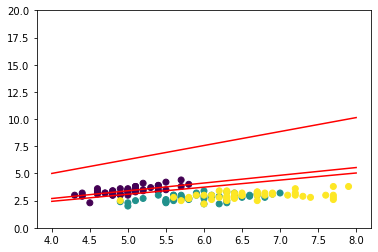

In [143]:
# -*- coding: utf-8 -*-
import numpy as np
import torch
from torch import nn

device = torch.device("cpu")

# Randomly initialize weights
w1 = torch.rand((), device=device, dtype=torch.float, requires_grad=True)
w2 = torch.rand((), device=device, dtype=torch.float, requires_grad=True)
b = torch.rand((), device=device, dtype=torch.float, requires_grad=True)

# Prepare data 
x_torch = torch.Tensor(x)
y_torch = torch.Tensor(y)
learning_rate = 1e-4
        
for t in range(10000):
    y_pred = torch.sigmoid(x_torch[:,0]*w1+x_torch[:,1]*w2+b)
    loss = (y_pred - y_torch).pow(2).sum()
    loss.backward() # Slik finnes gradienter på koeffisientene
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b  -= learning_rate * b.grad
        
        w1.grad = None
        w2.grad = None
        b.grad = None
        
    if t in [100, 300, 500, 1000, 2000, 3000, 6000]:# == 99 and t >= 1000:
        print(t, loss)
        plot_decision_boundary(w1.item(), w2.item(), b.item())
    
        
plt.scatter(x[:,0], x[:,1], c=y)
plt.ylim([0,20])
print(w1.item(), w2.item(), b.item())

---
### Underveisoppgave
Kan dere beskrive med ord, likninger og tegne opp den modellen vi har jobbet med her. Hvordan ser modellen egentlig ut? 

Prøv å kjøre modellen med forskjellinge læringsrater. Hva har den å si? 

Det finnes en alvorlig svakhet i modellen. Se på dataene og utfallsrommet til modellen. Hva er fullstendig kokos?

**Rette opp i utfallsrommet. Modellen blir mer stabil!** Detaljene får mindre å si, ikke like avhengig av heldig utgangspunknt eller presis læringsrate.

Samle opp loss i en liste og plott etter treningen. 

---

## En bedre modell 
Vi skal nå lage en modell som klarer å skille mellom alle typene iris-blomster. 

---
### Underveisoppgave
Plottet vi lagde i begynnelsen levner ikke mye håp om å finne en bedre modell. Men vi har bare brukt de to første kolonnene i datasettet. Hva om vi bruker flere. 

Husk på følgende kode for å plotte to kolonner og fargelegge med art:



Text(0, 0.5, 'sepal width')

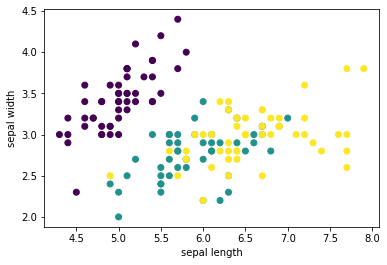

In [141]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(0,1,2,3))
species = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(4), dtype=str)

y = np.zeros(len(species))
y[species == "setosa"] = 0
y[species == "versicolor"] = 1
y[species == "virginica"] = 2

plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Undersøk om det finnes andre kombinasjoner av kolonner som gir håp om at vi kan skille alle blomstene fra hverandre! 

**Svaret her bør si oss at dette lar seg gjøre. Vi ser at det går, dermed bøe det finnes et nevralt nett som får det til**

---

### Nettverksarkitektur som passer (tegne på iPad)

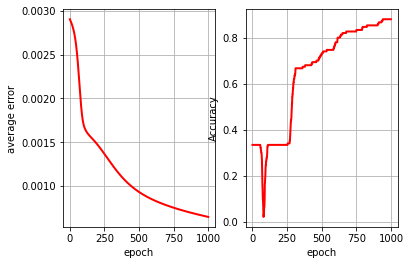

Final accuracy:  0.8799999952316284


In [178]:
import pandas as pd

url = "https://programmering-i-skolen.github.io/programmeringiskolen/_static/datasett/iris.csv"
data = pd.read_csv(url)
dummies = pd.get_dummies(data[["Species"]], columns=["Species"])

y = torch.Tensor(dummies.values)
x = torch.Tensor(data.drop(columns=["Species"]).values)

# Sette opp en modell 
model = torch.nn.Sequential(
          torch.nn.Linear(4, 3),
          torch.nn.Softmax(), # Passer på at sannsynlighetene til sammen blir 1
    )

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Vent med dette 
avg_loss_list = list()
epoch_list = list()
accuracy_list = list()

learning_rate = 1e-3
num_epoch = 1000

for epoch in range(num_epoch):
    # Her skjer alt av optimalisering! 
    y_pred = model(x)
    total_loss = loss_fn(y_pred, y)
    optimizer.zero_grad() # Nulle gradienten 
    total_loss.backward() # Backpropagation
    optimizer.step() # w_ij -= learning_rate * dC/dw_ij
    
    ## Samler opp diagnostikk (Vent)
    avg_loss = total_loss/x.size()[0]
    avg_loss_list.append(avg_loss.item())
    epoch_list.append(epoch)
    
    # (Vent)
    correct = (y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy_list.append(correct.sum()/correct.shape[0]) # np.prod(y.detach().numpy().size))
    
# Først: Så all mulig diagnose fra lister over loss. 
#display(y_pred.argmax(axis=1))
#display(y.argmax(axis=1))
#display(y_pred.argmax(axis=1) == y.argmax(axis=1))

# Plot loss (Vent)
plt.subplot(1, 2, 1)
plt.plot(epoch_list, avg_loss_list, 'r-', lw=2)
plt.xlabel("epoch")
plt.ylabel("average error")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_list, 'r-', lw=2)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("Final accuracy: ", (correct.sum()/correct.shape[0]).item())